# Calidad de datos y creacion del datamart analítico

## Importacion de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

%config IPCompleter.greedy = True

import warnings
warnings.filterwarnings("ignore")

## Carga de datos

Para este caso disponemos de 4 ficheros: 

* Planta 1, datos de generación
* Planta 1, datos de sensor ambiental
* Planta 2, datos de generación
* Planta 2, datos de sensor ambiental

### Planta 1 - Datos de generación

In [2]:
p1g = pd.read_csv("../Datos/Plant_1_Generation_Data.csv")
p1g

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,17-06-2020 23:45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,17-06-2020 23:45,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,17-06-2020 23:45,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,17-06-2020 23:45,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


### Planta 2 - Datos de generación

In [3]:
p2g = pd.read_csv("../Datos/Plant_2_Generation_Data.csv")
p2g

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07
...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05
67694,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08
67695,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06
67696,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08


### Planta 1 - Sensores

In [4]:
p1w = pd.read_csv("../Datos/Plant_1_Weather_Sensor_Data.csv")
p1w

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


### Planta 2 - Sensores

In [5]:
p2w = pd.read_csv("../Datos/Plant_2_Weather_Sensor_Data.csv")
p2w

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0
...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,4136001,iq8k7ZNt4Mwm3w0,23.511703,22.856201,0.0
3255,2020-06-17 23:00:00,4136001,iq8k7ZNt4Mwm3w0,23.482282,22.744190,0.0
3256,2020-06-17 23:15:00,4136001,iq8k7ZNt4Mwm3w0,23.354743,22.492245,0.0
3257,2020-06-17 23:30:00,4136001,iq8k7ZNt4Mwm3w0,23.291048,22.373909,0.0


## Calidad de Datos

### Calidad de datos planta 1 - Generación

In [6]:
p1g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [7]:
p1g["DATE_TIME"] = pd.to_datetime(p1g.DATE_TIME, dayfirst=True)

In [9]:
p1g.PLANT_ID.unique()

array([4135001], dtype=int64)

In [10]:
p1g["PLANT_ID"] = p1g.PLANT_ID.replace(4135001, "p1")

Comprobamos que el identificador es único y le ponemos de nombre p1

In [11]:
p1g.describe().T

,count,mean,min,25%,50%,75%,max,std
DATE_TIME,68778,2020-06-01 08:02:49.458256896,2020-05-15 00:00:00,2020-05-24 00:45:00,2020-06-01 14:30:00,2020-06-09 20:00:00,2020-06-17 23:45:00,NaN
DC_POWER,68778.0,3147.426211,0.0,0.0,429.0,6366.964286,14471.125,4036.457169
AC_POWER,68778.0,307.802752,0.0,0.0,41.49375,623.61875,1410.95,394.396439
DAILY_YIELD,68778.0,3295.968737,0.0,0.0,2658.714286,6274.0,9163.0,3145.178309
TOTAL_YIELD,68778.0,6978711.760671,6183645.0,6512002.53575,7146685.0,7268705.90625,7846821.0,416271.982856


- Destaca la diferencia entre la media de la generación de corriente continua y alterna, llegandose a perder de media un 90% de la energía corriente generada. Esto puede deberse a datos atípicos. Mirando la mediana (percentil 50%) vemos que ocurre lo mismo. 



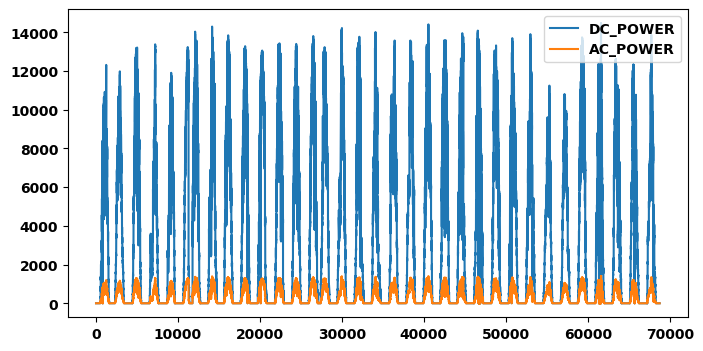

In [12]:
p1g[["DC_POWER", "AC_POWER"]].plot(figsize=(8,4))
plt.savefig("Generacion de energía P1");

- La diferencia es muy grande.
- Miramos la correlación. Cuando hay mas generación de DC, Se genera más AC. Esto debería ocurrir. 

In [14]:
p1g.DC_POWER.corr(p1g.AC_POWER)

0.9999962553332179

In [15]:
(p1g.DC_POWER / p1g.AC_POWER).describe()

count    36827.000000
mean        10.233664
std          0.048174
min          9.381550
25%         10.202582
50%         10.220231
75%         10.248110
max         10.465522
dtype: float64

- Parece que los Inverters están transformando solo el 10% de DC a AC, lo cual a priori es muy bajo, con una desviación típica cernana a 0, por tanto este medición se mantiene constante para todos los datos que tenemos.

- De momento se llega hasta aquí, posteriormente se comparará con la planta 2

- Se analiza la variable categórica, el **identificador de inverters**

In [16]:
p1g.SOURCE_KEY.nunique()

22

In [17]:
p1g.SOURCE_KEY.value_counts()

SOURCE_KEY
bvBOhCH3iADSZry    3155
1BY6WEcLGh8j5v7    3154
7JYdWkrLSPkdwr4    3133
VHMLBKoKgIrUVDU    3133
ZnxXDlPa8U1GXgE    3130
ih0vzX44oOqAx2f    3130
z9Y9gH1T5YWrNuG    3126
wCURE6d3bPkepu2    3126
uHbuxQJl8lW7ozc    3125
pkci93gMrogZuBj    3125
iCRJl6heRkivqQ3    3125
rGa61gmuvPhdLxV    3124
sjndEbLyjtCKgGv    3124
McdE0feGgRqW7Ca    3124
zVJPv84UY57bAof    3124
ZoEaEvLYb1n2sOq    3123
1IF53ai7Xc0U56Y    3119
adLQvlD726eNBSB    3119
zBIq5rxdHJRwDNY    3119
WRmjgnKYAwPKWDb    3118
3PZuoBAID5Wc2HD    3118
YxYtjZvoooNbGkE    3104
Name: count, dtype: int64

**conclusiones:**

    * La planta 1 tiene 22 inverters
    * Todos tienen un número similar de medidas aunque no exactamente igual
    * Podrían ser paradas por mantenimientos, o simples pérdidas de datos pero lo apuntamos para la fase de análisis

Vamos a analizar la variables DAILY_YIELD, ya que los metadatos nos dicen que la variable TOTAL_YIELD es el total acumulado por inverter, pero en DAILY_YIELD no lo especifica, por lo que no sabemos si es un acumulado por inverter o por planta.

La hipótesis es la siguiente: si es por planta no debería haber diferencias entre el dato de los diferentes inverters en el mismo momento puntual.

Y por consiguiente si vemos que sí hay diferencias entonces es que el dato es por inverter.

Para comprobarlo nos sirve con coger una muestra de inverters.

In [18]:
inverters = list(p1g.SOURCE_KEY.unique()[:5])

In [19]:
temp = p1g[p1g.SOURCE_KEY.isin(inverters)].set_index("DATE_TIME")

In [20]:
temp

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,,,
2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0
...,...,...,...,...,...,...
2020-06-17 23:45:00,p1,1BY6WEcLGh8j5v7,0.0,0.0,5521.0,6485319.0
2020-06-17 23:45:00,p1,1IF53ai7Xc0U56Y,0.0,0.0,6034.0,6433566.0
2020-06-17 23:45:00,p1,3PZuoBAID5Wc2HD,0.0,0.0,6052.0,7237425.0


- Comprobamos que la variable DAILY_YIELD es tambíen por inverter, ya que vemos que tiene datos diferentes para diferentes inverters en la misma ventana temporal.
- Se filtra el dataset para ver unos días graficamente. 

In [21]:
temp = temp.loc["2020-06-01":"2020-06-15"]

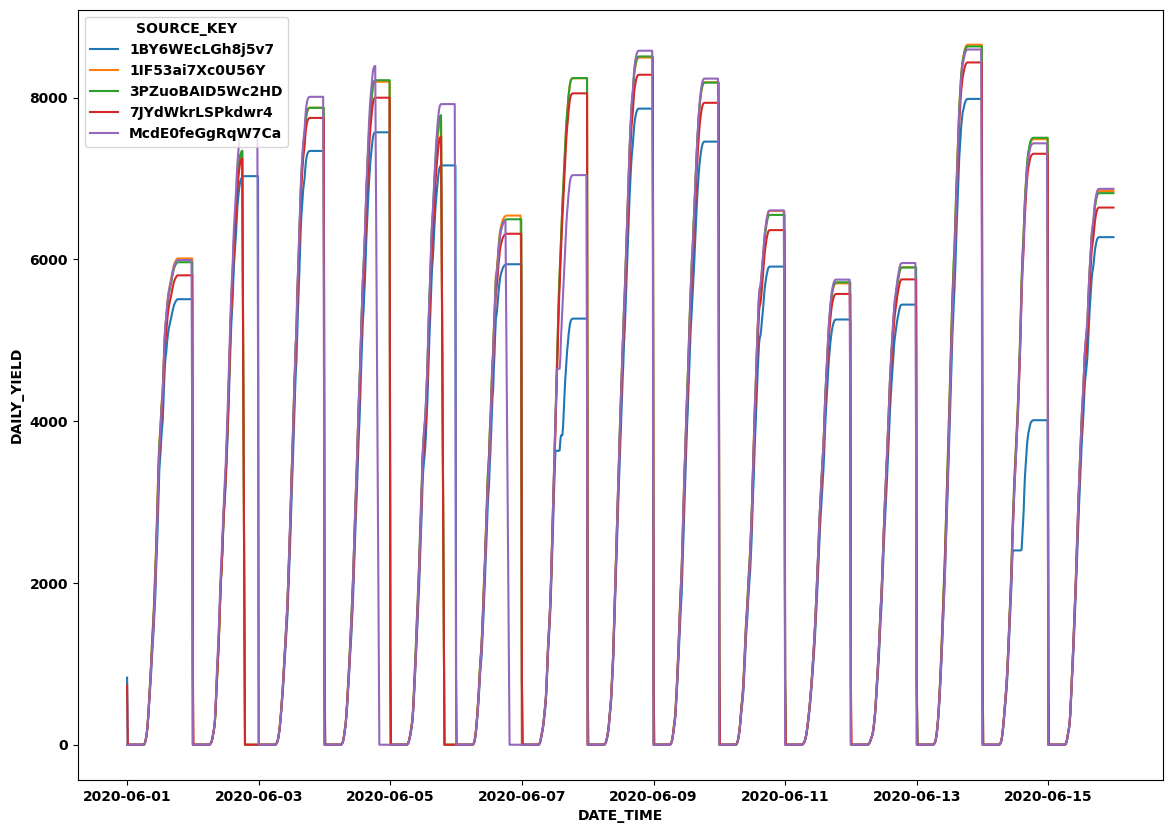

In [22]:
plt.figure(figsize=(14,10))
sns.lineplot(data=temp, x=temp.index, y = "DAILY_YIELD", hue = "SOURCE_KEY");

- Se puede ver que diferentes inverters tienen diferentes datos en el mismo momento temporal, por lo que concluímos que la variable DAILY_YIELD es **por inverter**

- Por último vamos a analizar el período en el que tenemos datos y si el número de mediciones diarias es constante.

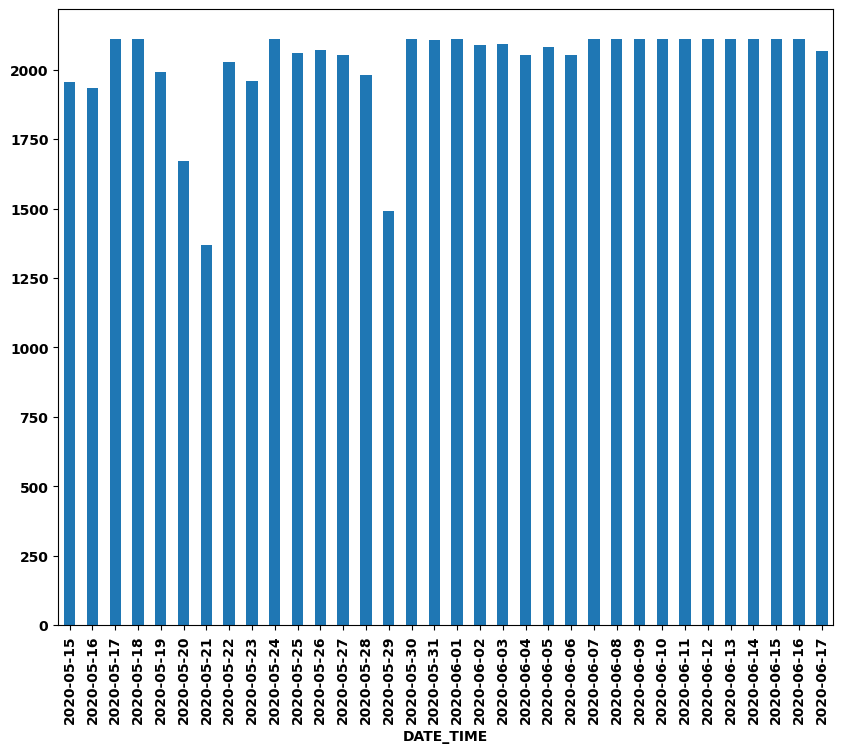

In [25]:
plt.figure(figsize=(8,6))
p1g.DATE_TIME.dt.date.value_counts().sort_index().plot.bar(figsize=(10,8));

**Conclusiones:**

    * El período de datos es entre el 15 de Mayo del 2020 y el 17 de Junio de 2020
    * Tenemos datos para todos los días, no falta ninguno intermedio
    * Pero algunos días como el 21/05 o el 29/05 tienen menos mediciones
    * Por lo que no parece 100% regular

### Calidad de datos planta 1 - Sensores ambientales

In [26]:
p1w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


In [27]:
p1w.DATE_TIME = pd.to_datetime(p1w.DATE_TIME)

In [28]:
p1w.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [26]:
p1w["PLANT_ID"] = p1w.PLANT_ID.replace(4135001,"p1")
p1w

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,p1,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,p1,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,p1,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,p1,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,p1,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,p1,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,p1,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,p1,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,p1,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


In [30]:
p1w.describe().round(2).T

,count,mean,min,25%,50%,75%,max,std
DATE_TIME,3182,2020-06-01 05:52:22.080452608,2020-05-15 00:00:00,2020-05-23 22:48:45,2020-06-01 09:52:30,2020-06-09 16:56:15,2020-06-17 23:45:00,NaN
AMBIENT_TEMPERATURE,3182.0,25.53,20.4,22.71,24.61,27.92,35.25,3.35
MODULE_TEMPERATURE,3182.0,31.09,18.14,21.09,24.62,41.31,65.55,12.26
IRRADIATION,3182.0,0.23,0.0,0.0,0.02,0.45,1.22,0.3


In [31]:
p1w.SOURCE_KEY.nunique()

1

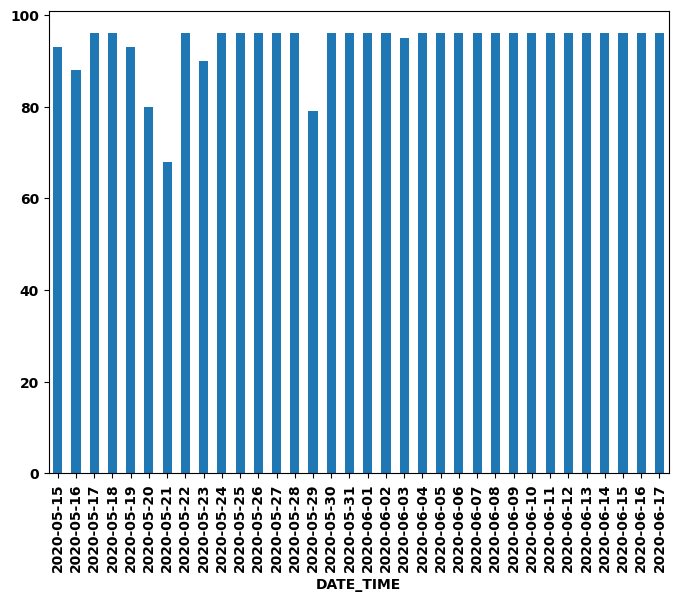

In [32]:
p1w.DATE_TIME.dt.date.value_counts().sort_index().plot.bar(figsize = (8,6))
plt.savefig("Mediciones sensor temperatura ambiente P1");

**Conclusiones:**

    * El período de datos es entre el 15 de Mayo del 2020 y el 17 de Junio de 2020
    * Tenemos datos para todos los días, no falta ninguno intermedio
    * Pero algunos días como el 21/05 o el 29/05 tienen menos mediciones
    * Por lo que no parece 100% regular

### Calidad de datos planta 2 - Generación

In [27]:
p2g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4   AC_POWER     67698 non-null  float64
 5   DAILY_YIELD  67698 non-null  float64
 6   TOTAL_YIELD  67698 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.6+ MB


In [34]:
p2g.DATE_TIME = pd.to_datetime(p2g.DATE_TIME)
p2g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    67698 non-null  datetime64[ns]
 1   PLANT_ID     67698 non-null  int64         
 2   SOURCE_KEY   67698 non-null  object        
 3   DC_POWER     67698 non-null  float64       
 4   AC_POWER     67698 non-null  float64       
 5   DAILY_YIELD  67698 non-null  float64       
 6   TOTAL_YIELD  67698 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.6+ MB


In [28]:
p2g.PLANT_ID = p2g.PLANT_ID.replace(4136001, "p2")

In [38]:
pd.options.display.float_format = '{:15.2f}'.format

In [39]:
p2g.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
DC_POWER,67698.00,246.70,370.57,0.00,0.00,0.00,446.59,1420.93
AC_POWER,67698.00,241.28,362.11,0.00,0.00,0.00,438.22,1385.42
DAILY_YIELD,67698.00,3294.89,2919.45,0.00,272.75,2911.00,5534.00,9873.00
TOTAL_YIELD,67698.00,658944788.42,729667771.07,0.00,19964944.87,282627587.00,1348495113.00,2247916295.00


- En esta planta la media de AC y de DC son muy similares, siendo AC un poco menor, pero gran diferencia con respecto a la planta 1, donde AC era 10 veces menor que DC.
- Calculamos el ratio

In [30]:
(p2g.DC_POWER/p2g.AC_POWER).describe().round(2)

count    32036.00
mean         1.02
std          0.01
min          0.99
25%          1.02
50%          1.02
75%          1.03
max          1.10
dtype: float64

- Ahora los valores del ratio son muy cercanos a uno.
- De media el ratio de DC es aproximadement un 2% superior a AC. Hay algunos casos donde AC es mayor que DC, esto a priori es raro, puede tener su explicacion técnica.
- No parece muy importante. En periodos máximos se esta consiguiendo una transformación de un 90%. 

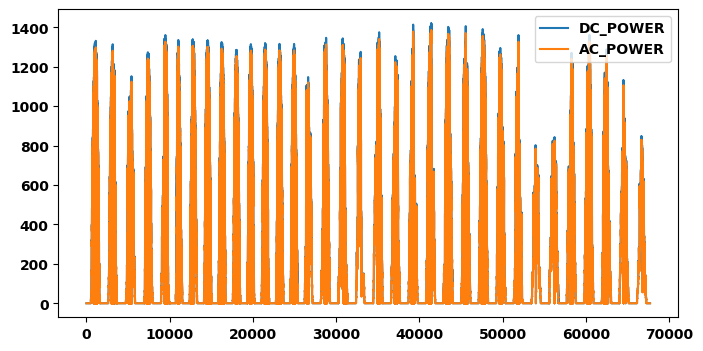

In [31]:
p2g[["DC_POWER", "AC_POWER"]].plot(figsize=(8,4));

In [40]:
p2g.SOURCE_KEY.nunique()

22

In [41]:
p2g.SOURCE_KEY.value_counts()

SOURCE_KEY
xoJJ8DcxJEcupym    3259
WcxssY2VbP4hApt    3259
9kRcWv60rDACzjR    3259
vOuJvMaM2sgwLmb    3259
rrq4fwE8jgrTyWY    3259
LYwnQax7tkwH5Cb    3259
LlT2YUhhzqhg5Sw    3259
q49J1IKaHRwDQnt    3259
oZZkBaNadn6DNKz    3259
PeE6FRyGXUgsRhN    3259
81aHJ1q11NBPMrL    3259
V94E5Ben1TlhnDV    3259
oZ35aAeoifZaQzV    3195
4UPUqMRk7TRMgml    3195
Qf4GUc1pJu5T6c6    3195
Mx2yZCDsyf6DPfv    3195
Et9kgGMDl729KT4    3195
Quc1TzYxW2pYoWX    3195
mqwcsP2rE7J0TFp    2355
NgDl19wMapZy17u    2355
IQ2d7wF4YD8zU1Q    2355
xMbIugepa2P7lBB    2355
Name: count, dtype: int64

**Conclusiones:**

    * La planta 2 tiene 22 inverters
    * Todos tienen un número similar de medidas aunque no exactamente igual
    * A excepción de 4 que tienen unas 800 medidas menos
    * Lo apuntamos para la fase de análisis

Los ultimos 4 inverters en la planta 2 han captado menos datos. 

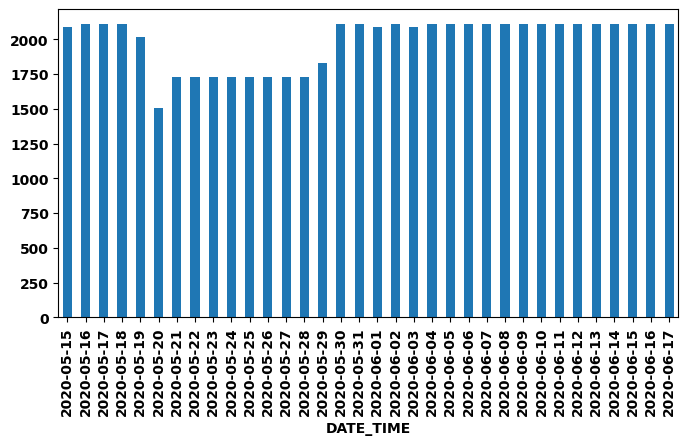

In [42]:
p2g.DATE_TIME.dt.date.value_counts().sort_index().plot.bar(figsize= (8,4));

**Conclusiones:**

    * El período de datos es entre el 15 de Mayo del 2020 y el 17 de Junio de 2020
    * Tenemos datos para todos los días, no falta ninguno intermedio
    * Pero algunos días como el 20/05 y varios más tienen menos mediciones
    * Por lo que no parece 100% regular. Hay 7 dias consecutivos en los que se han recibido menos datos. Habría que preguntar a los expertos de negocio.Suecede algo similar el 5 de mayo en la planta 1.

### Calidad de datos planta 2 - Sensores Ambientales

In [43]:
p2w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3259 non-null   object 
 1   PLANT_ID             3259 non-null   int64  
 2   SOURCE_KEY           3259 non-null   object 
 3   AMBIENT_TEMPERATURE  3259 non-null   float64
 4   MODULE_TEMPERATURE   3259 non-null   float64
 5   IRRADIATION          3259 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 152.9+ KB


In [32]:
p2w.DATE_TIME = pd.to_datetime(p2w.DATE_TIME)
p2w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3259 non-null   datetime64[ns]
 1   PLANT_ID             3259 non-null   int64         
 2   SOURCE_KEY           3259 non-null   object        
 3   AMBIENT_TEMPERATURE  3259 non-null   float64       
 4   MODULE_TEMPERATURE   3259 non-null   float64       
 5   IRRADIATION          3259 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 152.9+ KB


In [33]:
p2w.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


In [34]:
p2w.PLANT_ID = p2w.PLANT_ID.replace(4136001,"p2")

In [36]:
p2w.describe().round(2).T

,count,mean,min,25%,50%,75%,max,std
DATE_TIME,3259,2020-06-01 00:04:35.053697536,2020-05-15 00:00:00,2020-05-23 12:07:30,2020-06-01 00:00:00,2020-06-09 12:07:30,2020-06-17 23:45:00,NaN
AMBIENT_TEMPERATURE,3259.0,28.07,20.94,24.6,26.98,31.06,39.18,4.06
MODULE_TEMPERATURE,3259.0,32.77,20.27,23.72,27.53,40.48,66.64,11.34
IRRADIATION,3259.0,0.23,0.0,0.0,0.02,0.44,1.1,0.31


- Es posible que las plantas estén en una zona geográfica similar pero al mismo tiempo tampoco demasiado cerca. Teniendo la planta 2 una temperatura máxima 4 grados más elevada y una mínima 3 grados superior. La irradiacion es muy similar en ambas plantas. 

In [48]:
p2w.SOURCE_KEY.nunique()

1

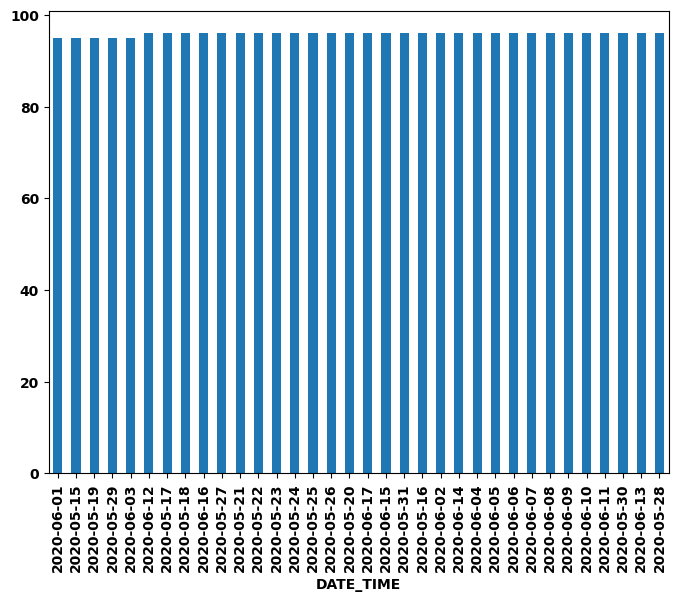

In [37]:
p2w.DATE_TIME.dt.date.value_counts().sort_values().plot.bar(figsize = (8,6));

**Conclusiones:**

    * El período de datos es entre el 15 de Mayo del 2020 y el 17 de Junio de 2020
    * Tenemos datos para todos los días, no falta ninguno intermedio
    * Pero algunos días como el 15/05 u otros tienen menos mediciones, aunque faltan mucho menos que en los otros datasets
    * Pero no parece 100% regular

### Principales insights de la calidad de datos: 

- En la planta 1 los inverters solo estan transformando el 10% de DC a AC. La planta 1 tiene unos niveles de DC 10 veces mas altos que la planta 2, cuando hemos visto que son dos plantas muy similares en cuanto a la temperatura ambiente y en la cantidad de irradiación que reciben. Esto es lo más extraño.
  
  * Posibles escenarios:
1) Que se estuviera midiendo mal la generacion de DC en la planta 1
2) Los inverters de la planta 1 estén trabajando solo a un 10% de su capacidad. 
- Los intervalos de medida no son 100% regulares, si exiten algunos patrones en cuanto a los dias que hay menos datos. Esto no se produce en los sensores de la planta 2. 

## DATAMART ANALITICO

1) Unimos los datasets de generación de ambas plantas
2) Unimos los datasetts de sensores ambientales
3) Cruzamos ambos datasets por campos clave


### Unión de los datasets de generación

In [58]:
generacion = pd.concat([p1g, p2g], axis = "index")
generacion

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00
1,2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00
2,2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00
3,2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00
4,2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00
...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00
67694,2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00
67695,2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00
67696,2020-06-17 23:45:00,p2,xMbIugepa2P7lBB,0.00,0.00,4218.00,106896394.00


- Vamos a renombrar ya las variables para hacerlas más descriptivas

In [59]:
generacion.columns = ["fecha", "planta", "inverter_id", "kw_dc", "kw_ac", "kw_dia", "kw_total"]
generacion

,fecha,planta,inverter_id,kw_dc,kw_ac,kw_dia,kw_total
0,2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00
1,2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00
2,2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00
3,2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00
4,2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00
...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00
67694,2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00
67695,2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00
67696,2020-06-17 23:45:00,p2,xMbIugepa2P7lBB,0.00,0.00,4218.00,106896394.00


Ahora que tenemos lo datos de las 2 plantas unidos vamos a hacer un análisis de coherencia, dado que según la documentación kw_dia y kw_total están directamente relacionados con kw_dc y kw_ac.

Vamos a intentar replicar los datos de kw_dia y kw_total.

In [62]:
generacion["fecha"] = pd.to_datetime(generacion.fecha, dayfirst=True)

In [64]:
generacion2 = generacion.copy()

In [65]:
generacion2['date'] = generacion2.fecha.dt.date


In [66]:
generacion2["date"] = generacion2.fecha.dt.date

In [67]:
pd.options.display.float_format = '{:.2f}'.format

In [68]:
generacion2 = generacion2.groupby(['planta','date','inverter_id']).agg({'kw_dc':'sum',
                                                              'kw_ac':'sum',
                                                              'kw_dia':'max',
                                                              'kw_total':'max'}).reset_index()
generacion2

,planta,date,inverter_id,kw_dc,kw_ac,kw_dia,kw_total
0,p1,2020-05-15,1BY6WEcLGh8j5v7,235340.70,23046.55,5754.00,6265313.00
1,p1,2020-05-15,1IF53ai7Xc0U56Y,258911.11,25343.29,6357.00,6190002.00
2,p1,2020-05-15,3PZuoBAID5Wc2HD,254766.05,24937.70,6274.00,6994033.00
3,p1,2020-05-15,7JYdWkrLSPkdwr4,250608.34,24533.91,6116.00,7609076.00
4,p1,2020-05-15,McdE0feGgRqW7Ca,264030.98,25840.63,6471.00,7165435.00
...,...,...,...,...,...,...,...
1459,p2,2020-06-17,q49J1IKaHRwDQnt,17001.51,16655.15,4157.00,520758.00
1460,p2,2020-06-17,rrq4fwE8jgrTyWY,16073.93,15748.92,3931.00,121131356.00
1461,p2,2020-06-17,vOuJvMaM2sgwLmb,17710.00,17345.44,4322.00,2427691.00
1462,p2,2020-06-17,xMbIugepa2P7lBB,17211.23,16860.38,5502.00,106896394.00


In [69]:
generacion2 = generacion2.sort_values(["planta", "inverter_id", "date"])
generacion2

,planta,date,inverter_id,kw_dc,kw_ac,kw_dia,kw_total
0,p1,2020-05-15,1BY6WEcLGh8j5v7,235340.70,23046.55,5754.00,6265313.00
22,p1,2020-05-16,1BY6WEcLGh8j5v7,256629.88,25124.49,6292.00,6271605.00
44,p1,2020-05-17,1BY6WEcLGh8j5v7,288039.82,28172.85,7045.00,6278650.00
66,p1,2020-05-18,1BY6WEcLGh8j5v7,204030.30,19970.51,4998.00,6283648.00
88,p1,2020-05-19,1BY6WEcLGh8j5v7,232277.27,22741.18,6449.00,6290097.00
...,...,...,...,...,...,...,...
1375,p2,2020-06-13,xoJJ8DcxJEcupym,27443.74,26840.58,6632.00,209312200.00
1397,p2,2020-06-14,xoJJ8DcxJEcupym,30768.78,30088.97,7268.00,209319687.00
1419,p2,2020-06-15,xoJJ8DcxJEcupym,25597.24,25049.49,7412.67,209325949.00
1441,p2,2020-06-16,xoJJ8DcxJEcupym,22335.69,21870.63,6203.20,209331425.00


- kw_dia en la documentación DAYLY_YIELD : Daily yield es un acumulado de la energía generada en el día, hasta ese momento
- Kw_total en la documentación: Es la energía total generada por el inverter hasta ese momento. 

Kw_dia no concuerda para nada ni con kw_dc ni con kw_ac.

Vamos a ver si concuerda con kw_total, para ello calculamos el incremento diario de kw_total que debería coincidir con el máximo de kw_dia del día anterior.

In [70]:
generacion2["lag_1_dia"] = generacion2.groupby(["planta", "inverter_id"]).kw_total.shift(1)

In [71]:
generacion2["incremento"] = generacion2.kw_total - generacion2.lag_1_dia

In [72]:
generacion2

,planta,date,inverter_id,kw_dc,kw_ac,kw_dia,kw_total,lag_1_dia,incremento
0,p1,2020-05-15,1BY6WEcLGh8j5v7,235340.70,23046.55,5754.00,6265313.00,NaN,NaN
22,p1,2020-05-16,1BY6WEcLGh8j5v7,256629.88,25124.49,6292.00,6271605.00,6265313.00,6292.00
44,p1,2020-05-17,1BY6WEcLGh8j5v7,288039.82,28172.85,7045.00,6278650.00,6271605.00,7045.00
66,p1,2020-05-18,1BY6WEcLGh8j5v7,204030.30,19970.51,4998.00,6283648.00,6278650.00,4998.00
88,p1,2020-05-19,1BY6WEcLGh8j5v7,232277.27,22741.18,6449.00,6290097.00,6283648.00,6449.00
...,...,...,...,...,...,...,...,...,...
1375,p2,2020-06-13,xoJJ8DcxJEcupym,27443.74,26840.58,6632.00,209312200.00,209305520.00,6680.00
1397,p2,2020-06-14,xoJJ8DcxJEcupym,30768.78,30088.97,7268.00,209319687.00,209312200.00,7487.00
1419,p2,2020-06-15,xoJJ8DcxJEcupym,25597.24,25049.49,7412.67,209325949.00,209319687.00,6262.00
1441,p2,2020-06-16,xoJJ8DcxJEcupym,22335.69,21870.63,6203.20,209331425.00,209325949.00,5476.00


Comprobamos en la planta 1.

In [73]:
generacion2[generacion2["planta"]=="p1"].head(50)

,planta,date,inverter_id,kw_dc,kw_ac,kw_dia,kw_total,lag_1_dia,incremento
0,p1,2020-05-15,1BY6WEcLGh8j5v7,235340.70,23046.55,5754.00,6265313.00,NaN,NaN
22,p1,2020-05-16,1BY6WEcLGh8j5v7,256629.88,25124.49,6292.00,6271605.00,6265313.00,6292.00
44,p1,2020-05-17,1BY6WEcLGh8j5v7,288039.82,28172.85,7045.00,6278650.00,6271605.00,7045.00
66,p1,2020-05-18,1BY6WEcLGh8j5v7,204030.30,19970.51,4998.00,6283648.00,6278650.00,4998.00
88,p1,2020-05-19,1BY6WEcLGh8j5v7,232277.27,22741.18,6449.00,6290097.00,6283648.00,6449.00
110,p1,2020-05-20,1BY6WEcLGh8j5v7,230412.62,22516.26,8249.00,6298346.00,6290097.00,8249.00
132,p1,2020-05-21,1BY6WEcLGh8j5v7,288676.60,28223.13,7243.00,6305589.00,6298346.00,7243.00
154,p1,2020-05-22,1BY6WEcLGh8j5v7,280809.07,27456.63,6848.00,6312437.00,6305589.00,6848.00
176,p1,2020-05-23,1BY6WEcLGh8j5v7,326468.27,31922.93,7966.00,6320403.00,6312437.00,7966.00
198,p1,2020-05-24,1BY6WEcLGh8j5v7,309111.73,30220.37,7537.00,6327940.00,6320403.00,7537.00


Conclusiones:
* kw_dia tiene coherencia con kw_total
* pero éstas no tienen coherencia con kw_dc ni con kw_ac
* es como si estuvieran en diferentes unidades o hubiera algún cálculo del que no somos conscientes
* por tanto tendremos 2 bloques a poder usar: o bien kw_dc con kw_ac, o bien kw_dia con kw_total, pero no podemos mezclarlas entre sí

### Unión de los datasets de mediciones ambientales

In [74]:
sensores = pd.concat([p1w, p2w], axis=0)
sensores

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,p1,HmiyD2TTLFNqkNe,25.18,22.86,0.00
1,2020-05-15 00:15:00,p1,HmiyD2TTLFNqkNe,25.08,22.76,0.00
2,2020-05-15 00:30:00,p1,HmiyD2TTLFNqkNe,24.94,22.59,0.00
3,2020-05-15 00:45:00,p1,HmiyD2TTLFNqkNe,24.85,22.36,0.00
4,2020-05-15 01:00:00,p1,HmiyD2TTLFNqkNe,24.62,22.17,0.00
...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,p2,iq8k7ZNt4Mwm3w0,23.51,22.86,0.00
3255,2020-06-17 23:00:00,p2,iq8k7ZNt4Mwm3w0,23.48,22.74,0.00
3256,2020-06-17 23:15:00,p2,iq8k7ZNt4Mwm3w0,23.35,22.49,0.00
3257,2020-06-17 23:30:00,p2,iq8k7ZNt4Mwm3w0,23.29,22.37,0.00


In [75]:
sensores.columns = ["fecha", "planta", "sensor_id", "temperatura_ambiente", "temperatura_modulo", "irradiacion"]
sensores

,fecha,planta,sensor_id,temperatura_ambiente,temperatura_modulo,irradiacion
0,2020-05-15 00:00:00,p1,HmiyD2TTLFNqkNe,25.18,22.86,0.00
1,2020-05-15 00:15:00,p1,HmiyD2TTLFNqkNe,25.08,22.76,0.00
2,2020-05-15 00:30:00,p1,HmiyD2TTLFNqkNe,24.94,22.59,0.00
3,2020-05-15 00:45:00,p1,HmiyD2TTLFNqkNe,24.85,22.36,0.00
4,2020-05-15 01:00:00,p1,HmiyD2TTLFNqkNe,24.62,22.17,0.00
...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,p2,iq8k7ZNt4Mwm3w0,23.51,22.86,0.00
3255,2020-06-17 23:00:00,p2,iq8k7ZNt4Mwm3w0,23.48,22.74,0.00
3256,2020-06-17 23:15:00,p2,iq8k7ZNt4Mwm3w0,23.35,22.49,0.00
3257,2020-06-17 23:30:00,p2,iq8k7ZNt4Mwm3w0,23.29,22.37,0.00


### Creacion Tablon Analitico Final

En este caso el campo clave es compuesto de fecha y planta y manda el dataset de generación, ya que el de temperatura solo nos aporta variables adicionales.

In [76]:
generacion

,fecha,planta,inverter_id,kw_dc,kw_ac,kw_dia,kw_total
0,2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00
1,2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00
2,2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00
3,2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00
4,2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00
...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00
67694,2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00
67695,2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00
67696,2020-06-17 23:45:00,p2,xMbIugepa2P7lBB,0.00,0.00,4218.00,106896394.00


In [77]:
sensores

,fecha,planta,sensor_id,temperatura_ambiente,temperatura_modulo,irradiacion
0,2020-05-15 00:00:00,p1,HmiyD2TTLFNqkNe,25.18,22.86,0.00
1,2020-05-15 00:15:00,p1,HmiyD2TTLFNqkNe,25.08,22.76,0.00
2,2020-05-15 00:30:00,p1,HmiyD2TTLFNqkNe,24.94,22.59,0.00
3,2020-05-15 00:45:00,p1,HmiyD2TTLFNqkNe,24.85,22.36,0.00
4,2020-05-15 01:00:00,p1,HmiyD2TTLFNqkNe,24.62,22.17,0.00
...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,p2,iq8k7ZNt4Mwm3w0,23.51,22.86,0.00
3255,2020-06-17 23:00:00,p2,iq8k7ZNt4Mwm3w0,23.48,22.74,0.00
3256,2020-06-17 23:15:00,p2,iq8k7ZNt4Mwm3w0,23.35,22.49,0.00
3257,2020-06-17 23:30:00,p2,iq8k7ZNt4Mwm3w0,23.29,22.37,0.00


In [82]:
sensores["fecha"]= pd.to_datetime(sensores.fecha, dayfirst=True)

In [83]:
df = pd.merge(left=generacion, right=sensores, how="left", on=["fecha", "planta"])
df

,fecha,planta,inverter_id,kw_dc,kw_ac,kw_dia,kw_total,sensor_id,temperatura_ambiente,temperatura_modulo,irradiacion
0,2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
1,2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2,2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
3,2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
4,2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
...,...,...,...,...,...,...,...,...,...,...,...
136471,2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
136472,2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
136473,2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
136474,2020-06-17 23:45:00,p2,xMbIugepa2P7lBB,0.00,0.00,4218.00,106896394.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00


- Revisamos si se han generado nulos al unificar los datasets

In [84]:
df.isna().sum()

fecha                   0
planta                  0
inverter_id             0
kw_dc                   0
kw_ac                   0
kw_dia                  0
kw_total                0
sensor_id               4
temperatura_ambiente    4
temperatura_modulo      4
irradiacion             4
dtype: int64

- Al mandar la tabla de generacion en la union, hay algunos nulos que vienen del fichero de sensores, hay ventanas temporales en combinacion con plantas en las que no existe dato en el dataset de sensores

In [85]:
df[df.sensor_id.isna()]

,fecha,planta,inverter_id,kw_dc,kw_ac,kw_dia,kw_total,sensor_id,temperatura_ambiente,temperatura_modulo,irradiacion
38544,2020-06-03 14:00:00,p1,1IF53ai7Xc0U56Y,7003.00,685.80,5601.00,6330385.00,NaN,NaN,NaN,NaN
38545,2020-06-03 14:00:00,p1,adLQvlD726eNBSB,7204.00,705.40,5685.00,6419961.00,NaN,NaN,NaN,NaN
38546,2020-06-03 14:00:00,p1,wCURE6d3bPkepu2,7545.00,738.70,5579.00,6928448.00,NaN,NaN,NaN,NaN
38547,2020-06-03 14:00:00,p1,z9Y9gH1T5YWrNuG,7946.00,777.80,5541.00,7152815.00,NaN,NaN,NaN,NaN


- Estos 4 inverters de la tabla 1 no han obtenido informacion de temperatura el 03/06/2024

In [86]:
sensores[sensores.fecha.between("2020-06-03 13:30:00", "2020-06-03 14:30:00")]

,fecha,planta,sensor_id,temperatura_ambiente,temperatura_modulo,irradiacion
1797,2020-06-03 13:30:00,p1,HmiyD2TTLFNqkNe,28.56,48.78,0.75
1798,2020-06-03 13:45:00,p1,HmiyD2TTLFNqkNe,27.86,46.63,0.62
1799,2020-06-03 14:15:00,p1,HmiyD2TTLFNqkNe,28.36,50.63,0.72
1800,2020-06-03 14:30:00,p1,HmiyD2TTLFNqkNe,28.31,47.38,0.67
1874,2020-06-03 13:30:00,p2,iq8k7ZNt4Mwm3w0,28.60,37.68,0.41
1875,2020-06-03 13:45:00,p2,iq8k7ZNt4Mwm3w0,28.75,36.35,0.35
1876,2020-06-03 14:15:00,p2,iq8k7ZNt4Mwm3w0,30.45,45.63,0.76
1877,2020-06-03 14:30:00,p2,iq8k7ZNt4Mwm3w0,29.64,40.40,0.44


- Comprobamos que no hay datos en la ventana temporal de las 14:00 el día 3 de junio de 2020
- Eliminamos los registros al ser pocos y para pocos inverters

In [87]:
df.dropna(inplace=True)
df

,fecha,planta,inverter_id,kw_dc,kw_ac,kw_dia,kw_total,sensor_id,temperatura_ambiente,temperatura_modulo,irradiacion
0,2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
1,2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2,2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
3,2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
4,2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
...,...,...,...,...,...,...,...,...,...,...,...
136471,2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
136472,2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
136473,2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
136474,2020-06-17 23:45:00,p2,xMbIugepa2P7lBB,0.00,0.00,4218.00,106896394.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00


In [88]:
df.set_index("fecha", inplace=True)
df

,planta,inverter_id,kw_dc,kw_ac,kw_dia,kw_total,sensor_id,temperatura_ambiente,temperatura_modulo,irradiacion
fecha,,,,,,,,,,
2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
...,...,...,...,...,...,...,...,...,...,...
2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00


### Guardamos el DATAMART

In [90]:
df.to_pickle("../Datos/df.pickle")